# Credit Card Fraud Detection

## Importation

This is the part where we will be importing the libraries we will be using, as well as our dataset

### Libraries

In [ ]:
# Data Wrangling
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Warnings
import warnings
warnings.filterwarnings('ignore')

### Dataset

In [ ]:
# Loading the data from .csv to Pandas DataFrame

data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Data Cleaning

This is where we will clean our data, are there any missing values? Duplicates? Maybe it is formatted in a way we can't use so we will have to adjust it?

In [ ]:
# We use ".shape" to further understand the size of the dataset

data.shape

(284807, 31)

In [ ]:
# Getting even more information about our data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
data.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


Nothing is missing

We are now clean of empty records

In [ ]:
data.duplicated().sum()

1081

In [ ]:
# Theres a lot of duplicates so lets just drop them
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

We are now clean of duplicates

## Data Analysis

This part we will just try to analyze more information from what we can see in our cleaned dataset, usually mathematical in nature

In [ ]:
data.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [ ]:
# Shows how much records and fields we have (Records, Fields)

data.shape

(283726, 31)

In [ ]:
# Because we have so much columns/fields, lets list them all out

data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
# To see some mathematical information from our dataset
# We willl also round it up to 3 decimals because its too much and long

round(data.describe(),3).T

,count,mean,std,min,25%,50%,75%,max
Time,283726.0,94811.078,47481.048,0.000,54204.750,84692.500,139298.000,172792.000
V1,283726.0,0.006,1.948,-56.408,-0.916,0.020,1.316,2.455
V2,283726.0,-0.004,1.647,-72.716,-0.600,0.064,0.800,22.058
V3,283726.0,0.002,1.509,-48.326,-0.890,0.180,1.027,9.383
V4,283726.0,-0.003,1.414,-5.683,-0.850,-0.022,0.740,16.875
V5,283726.0,0.002,1.377,-113.743,-0.690,-0.053,0.612,34.802
V6,283726.0,-0.001,1.332,-26.161,-0.769,-0.275,0.397,73.302
V7,283726.0,0.002,1.228,-43.557,-0.553,0.041,0.570,120.589
V8,283726.0,-0.001,1.179,-73.217,-0.209,0.022,0.326,20.007
V9,283726.0,-0.002,1.095,-13.434,-0.644,-0.053,0.596,15.595


In [ ]:
# From my understanding of this dataset, the Class field dictates whether or not the transaction is true or a fraud so lets dig deeper

data['Class'].value_counts()

,count
Class,
0,283253
1,473


Ok so in our dataset, we have:
* True Transactions: 283,253
* Fraudulent Transactions: 473

**Data Analysis Observations**


---

**Imbalanced Data** - The dataset has far fewer fraudulent transactions than legitimate ones, creating a class imbalance.

<br>

**Reasonings**


---


**Model Bias** - Class imbalance can bias machine learning models, favoring the majority class (legitimate transactions).


## Data Visualization

This is the part where we will visualize our data and try to gain more insight and understanding in them

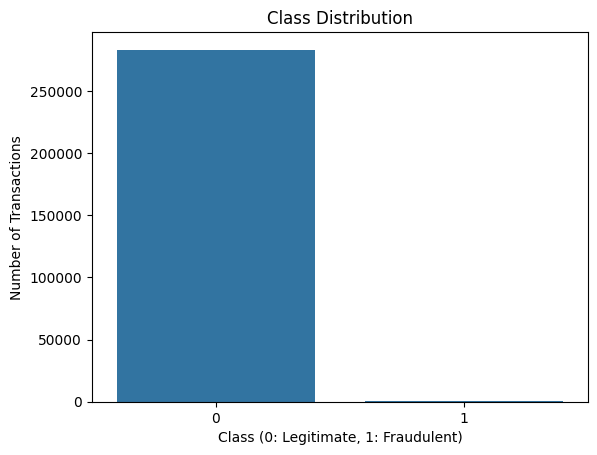

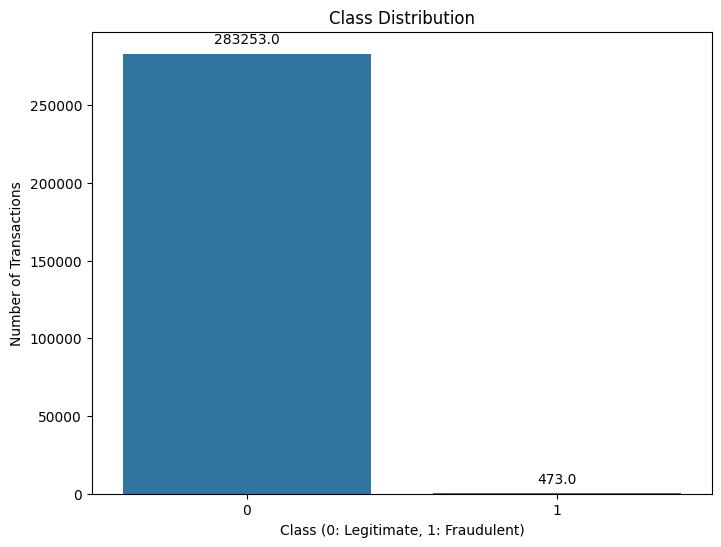

In [ ]:
# Countplot
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Class', data=data)
plt.title('Class Distribution')
plt.xlabel('Class (0: Legitimate, 1: Fraudulent)')
plt.ylabel('Number of Transactions')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

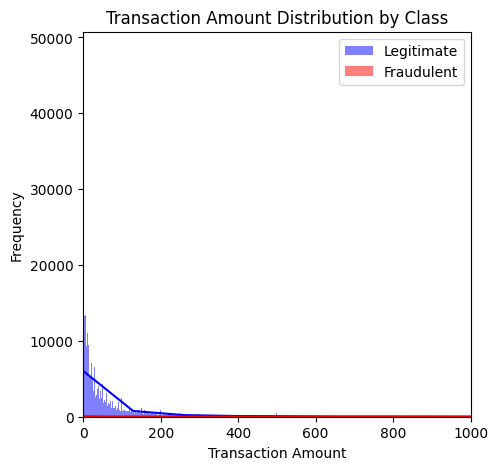

In [ ]:
# Histplot
plt.figure(figsize=(5, 5))
sns.histplot(data[data['Class'] == 0]['Amount'], label='Legitimate', kde=True, color='blue')
sns.histplot(data[data['Class'] == 1]['Amount'], label='Fraudulent', kde=True, color='red')
plt.title('Transaction Amount Distribution by Class')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.legend()
plt.xlim(0, 1000)
plt.show()

**Countplot and Histogram Observations**

---

We can see that there really is barey any amount of fraudulent cases at all when compared to real ones

<br>

**Reasonings**


---

We Can barely see anything at all in the visualizations


## Machine Learning

This is the start of where we will be building our prediction model

### Model Training

In [ ]:
# Feature Selection / What fields we will use for our model
X = data[['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']]
y = data['Class']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Model Training
log = LogisticRegression(random_state=0)
log.fit(X_train, y_train)

LogisticRegression(random_state=0)

### Model Prediction

In [ ]:
pred = print(log.predict(X_test))

[0 0 0 ... 0 0 0]


In [ ]:
print(y_test)

266174    0
34029     0
55925     0
225716    0
198821    0
         ..
23934     0
221887    0
283585    0
11190     0
237314    0
Name: Class, Length: 56746, dtype: int64


In [ ]:
feature_names = X_train.columns

input_data = {'Time': 3, 'V1': 0, 'V2': 26, 'Amount': 100}

for feature in feature_names:
    if feature not in input_data:
        input_data[feature] = X_train[feature].mean()

input_df = pd.DataFrame([input_data], columns=feature_names)

res = log.predict(input_df)

if res == 0:
    print("Legitemate Transaction")
else:
    print("Fraudulent Transaction")

Legitemate Transaction


**Description**


---


The code focuses on predicting whether a credit card transaction is fraudulent or not. It uses the pre-trained Logistic Regression model we made earlier to make predictions based on input transaction features.

To ensure accurate predictions, it fills missing feature values with averages from the training data, if it does not do this? We would have to mannually fill all 30 fields/collumns, and that is super tedious. So no lets just put the average so we will have an easier time.

If we want to though? We can put some more collumns/fields in input_data

Finally, it prints whether the transaction is predicted as a legitimate transaction or a fraudulent transaction.

<br>

**How it Works:**

* **Gathers Feature Names** - It retrieves the names of all features (columns) used during the model's training phase.

* **Creates Input Data** - It creates a dictionary to hold the input values for prediction, specifying 'Time', 'V1', 'V2', and 'Amount' for a specific transaction.

* **Fills Missing Features** - It uses a loop to fill any missing features with their average values calculated from the training data. This ensures the input data has the same structure as the data the model was trained on.

* **Creates a DataFrame** - It converts the input data dictionary to a Pandas DataFrame for compatibility with the model's prediction function.

* **Predicts and Prints** - It uses the trained model to predict the transaction's legitimacy and prints the result as either "True" or "Fraud".

<br>

In essence, the code snippet takes input transaction details, prepares the data for prediction, utilizes a pre-trained model to make a prediction, and communicates the outcome.

### Model Testing

In [ ]:
# Accuracy Score

y_pred = log.predict(X_test)  # Get predictions for the test data
accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy

print(f"Accuracy: {accuracy}")

Accuracy: 0.9989074119761745


In [ ]:
# Confusion Matrix

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[56630    29]
 [   33    54]]


**Accuracy Score**

The accuracy score of the model is approximately 0.999. This means that the model correctly predicted the class (legitimate or fraudulent) for about 99.9% of the transactions in the test dataset.

**Confusion Matrix**

*    True Negatives (TN): 56630 - The model correctly predicted 56630 legitimate transactions as legitimate.
*    False Positives (FP): 29 - The model incorrectly predicted 29 legitimate transactions as fraudulent.
*    False Negatives (FN): 33 - The model incorrectly predicted 33 fraudulent transactions as legitimate.
*    True Positives (TP): 54 - The model correctly predicted 54 fraudulent transactions as fraudulent.


**Testing Observations**

The model demonstrates strong overall performance with an accuracy of approximately 0.999 or 99.9%.

The dataset's imbalance between legitimate and fraudulent transactions should also be considered though considering the massive imbaance, like it would likely be the case that this needs more fraud data to be fed, and remember the drastic difference in our data visualization earlier?

So yeah while it has a 99.9% accuracy rating... It really should be fed more fraudulent data. But as seen from our confusion matrix, it should be good enough, for a start of a Credit Card Fraud Detection model

Despite this, the initial results show promise for the model's effectiveness in detecting credit card fraud.

## Conclusion

This project explored credit card fraud detection using a Logistic Regression model. Despite achieving a high accuracy of 99.9%, the dataset's significant class imbalance necessitates further analysis. While initial results are promising, it's crucial to consider the impact of imbalance on model performance.

Future work to improve this shoulld include gathering more fraudulent data for the most of it. Despite limitations, this project demonstrates machine learning's potential in this domain. With continued refinement and evaluation, such models can significantly contribute to protecting against financial fraud

**This project's Logistic Regression model effectively predicts credit card fraud based on transaction features, achieving a high accuracy of 99.9% despite a significant class imbalance.**